In [19]:
import cv2
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
import os

In [20]:
def canny(image):
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    blur=cv2.GaussianBlur(gray,(5,5),0)
    canny=cv2.Canny(blur,50,150)
    return canny

In [21]:
def region_of_interest(image):
    height=image.shape[0]
    ploygon=np.array([
        [(200,height),(1100,height),(550,250)]
    ])
    mask=np.zeros_like(image)
    cv2.fillPoly(mask,ploygon,255)
    masked_image=cv2.bitwise_and(image,mask)
    return masked_image

In [22]:
def display_lines(image,lines):
    line_image=np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2=line.reshape(4)
            cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),10)
    return line_image

In [23]:
def make_cordinates(image,line_parameters):
    slope,intercept=line_parameters
    y1=image.shape[0]
    y2=int(y1*(3/5))
    x1=int((y1-intercept)/slope)
    x2=int((y2-intercept)/slope)
    return np.array([x1,y1,x2,y2])
    

In [24]:
def average_slope_intercept(images,lines):
    left_fit=[]
    right_fit=[]
    for line in lines:
        x1,y1,x2,y2=line.reshape(4)
        parameters=np.polyfit((x1,x2),(y1,y2),1)
        slope=parameters[0]
        intercept=parameters[1]
        if slope < 0:
            left_fit.append((slope,intercept))
        else:
            right_fit.append((slope,intercept))
    left_fit_average=np.average(left_fit,axis=0)
    right_fit_average=np.average(right_fit,axis=0)
    left_line=make_cordinates(image,left_fit_average)
    right_line=make_cordinates(image,right_fit_average)
    return np.array([left_line,right_line])
    

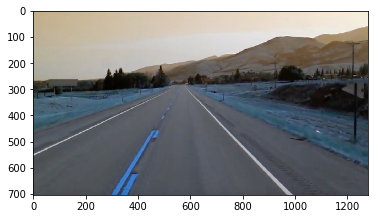

In [25]:
image=cv2.imread('C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\selfdriving\\test_image.jpg')
imshow(image)

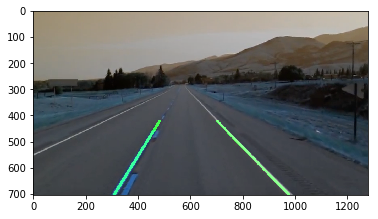

In [26]:
image=cv2.imread('C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\selfdriving\\test_image.jpg')
lane_image=np.copy(image)
canny=canny(lane_image)
cropped_image=region_of_interest(canny)
lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
averaged_lines=average_slope_intercept(lane_image,lines)
line_image=display_lines(lane_image,averaged_lines)

combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
imshow(combo_image,cmap='gray')

In [27]:
directory="C:\\Users\\Abhinav Raj\\Downloads\\Projects\\Images"
cap=cv2.VideoCapture('C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\selfdriving\\test2.mp4')
i=0
os.chdir(directory)
while(cap.isOpened()):
    _,frame=cap.read()
    canny_image=canny(frame)
    cropped_image=region_of_interest(canny_image)
    lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
    averaged_lines=average_slope_intercept(frame,lines)
    line_image=display_lines(frame,averaged_lines)
    combo_image=cv2.addWeighted(frame,0.8,line_image,1,1)
    a=str(i)+'.jpg'
    cv2.imwrite(a,combo_image) 
    i=i+1
    imshow(combo_image,cmap='gray')

TypeError: 'numpy.ndarray' object is not callable